<a href="https://colab.research.google.com/github/vishaljbind/CVIP-Projects/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis**

### Task: Choose a dataset with a time component and perform time series analysis

- Embark on a time series analysis project using a dataset with a time component, specifically historical stock prices. The objective is to uncover patterns, trends, and insights from the temporal data, enabling a better understanding of stock price movements over time

Time series analysis is a statistical method that involves studying and analyzing data points collected over time to identify patterns, trends, and make predictions about future values.

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Loading and Exploring the dataset**

In [4]:
df = pd.read_csv('google_stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,810.869995,813.960022,798.260010,805.479980,805.479980,2355900
2015-01-07,510.950012,511.489990,503.649994,505.149994,505.149994,2345900
2014-02-05,572.262268,575.960938,564.574585,572.172180,572.172180,4784211
2019-08-07,1157.800049,1179.869995,1150.839966,1175.910034,1175.910034,1534300
2010-05-24,240.605606,245.140137,238.638641,238.818817,238.818817,8682509


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.3 KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [10]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Visualization of Time Series**

(Exploratory Data Analysis)

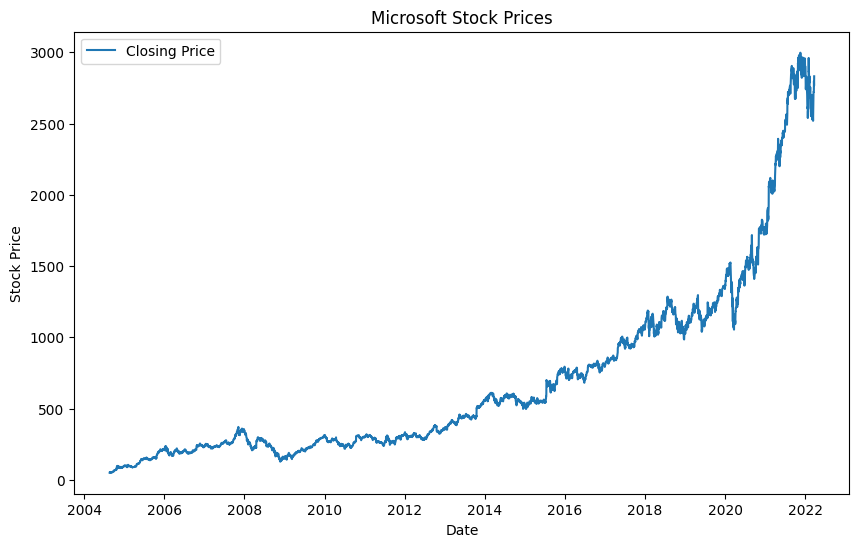

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Time Series Decomposition**

Decompose the time series into its components: trend, seasonality, and residuals. This helps in understanding the underlying patterns.

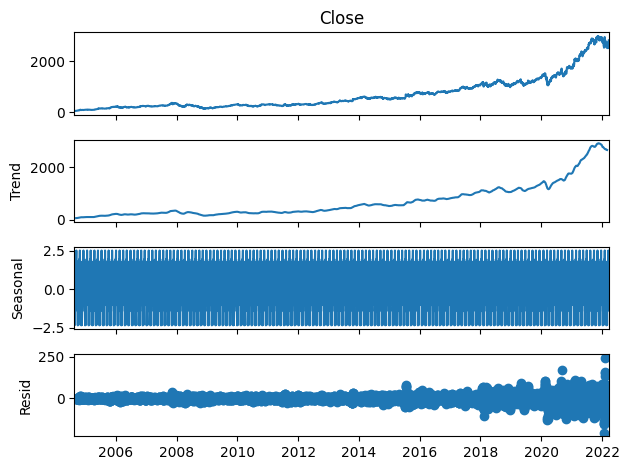

In [13]:
result = sd(df['Close'], model='additive', period=30)
result.plot()
plt.show()

### Statistical Analysis

- Conduct statistical tests for stationarity, such as the Augmented Dickey-Fuller (ADF) test.
- Check autocorrelation and partial autocorrelation functions to identify lag values for potential autoregressive (AR) and moving average (MA) terms in later modeling.

In [15]:
adf_result = adfuller(df['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: 3.2009812703227967
p-value: 1.0


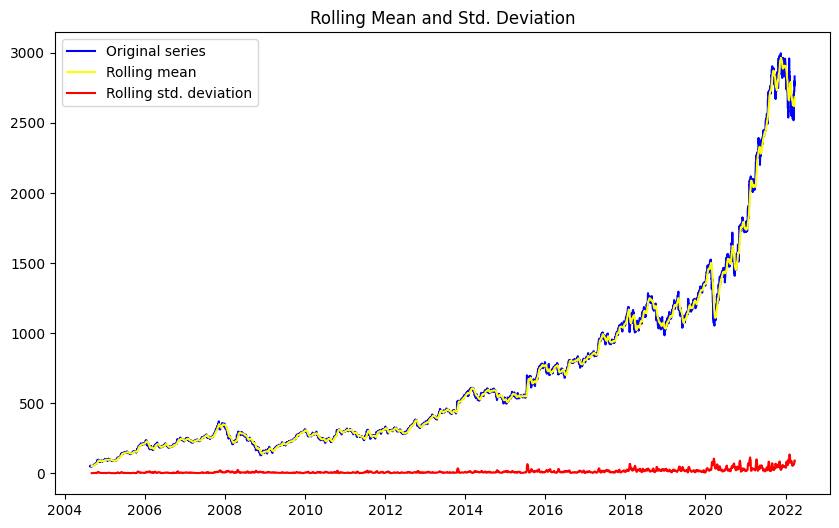

In [14]:
adf_mean = df['Close'].rolling(12).mean()
adf_std = df['Close'].rolling(12).std()

plt.figure(figsize=(10,6))
plt.plot(df['Close'], color='blue', label='Original series')
plt.plot(adf_mean, color='yellow', label='Rolling mean')
plt.plot(adf_std, color='red', label='Rolling std. deviation')

plt.legend(loc='best')
plt.title('Rolling Mean and Std. Deviation')
plt.show()

**Plotting autocorrelation**

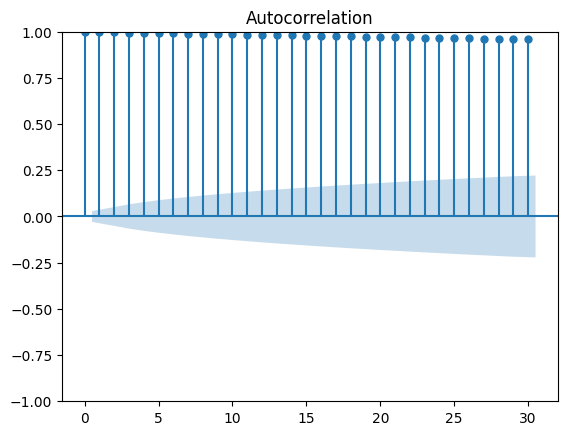

In [16]:
plot_acf(df['Close'], lags=30)
plt.show()

#### Plotting Partial autocorrelation functions

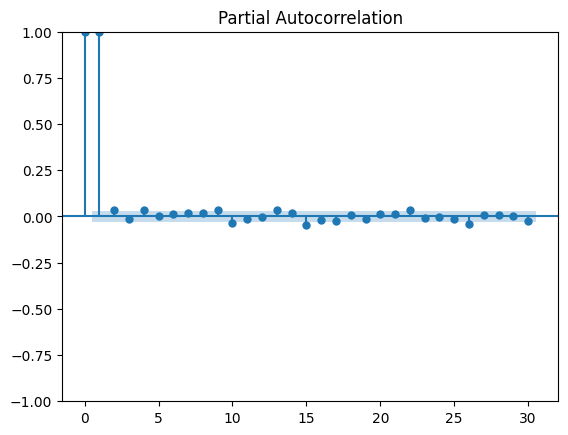

In [17]:
plot_pacf(df['Close'], lags=30, method='ywm')
plt.show()

**Resampling the data **
(On a daily, weekly, and monthly basis and calculate the mean stock price)

In [18]:
daily_prices = df['Close'].resample('D').mean()
print('Daily Variation in Stock Prices: ')
daily_prices.head()

Daily Variation in Stock Prices: 


Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-21          NaN
2004-08-22          NaN
2004-08-23    54.754753
Freq: D, Name: Close, dtype: float64

In [19]:
weekly_prices = df['Close'].resample('W').mean()
print('Weekly Variation in Stock Prices: ')
weekly_prices.head()

Weekly Variation in Stock Prices: 


Date
2004-08-22    52.214714
2004-08-29    53.486487
2004-09-05    50.665666
2004-09-12    51.491491
2004-09-19    56.301301
Freq: W-SUN, Name: Close, dtype: float64

In [20]:
monthly_prices = df['Close'].resample('M').mean()
print('Monthly Variation in Stock Prices: ')
monthly_prices.head()

Monthly Variation in Stock Prices: 


Date
2004-08-31    52.683795
2004-09-30    56.670241
2004-10-31    76.692168
2004-11-30    88.836454
2004-12-31    90.975975
Freq: M, Name: Close, dtype: float64

### Model Selection and Training (ARIMA)

- ARIMA stands for "AutoRegressive Integrated Moving Average"
- It combines three key components: AutoRegressive (AR), Integrated (I), and Moving Average (MA).
- ARIMA models are widely used for analyzing and forecasting time series data.

In [21]:
df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max(), freq='D'))

In [22]:
model = ARIMA(df['Close'], order=(5, 1, 5))
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'AR Model')

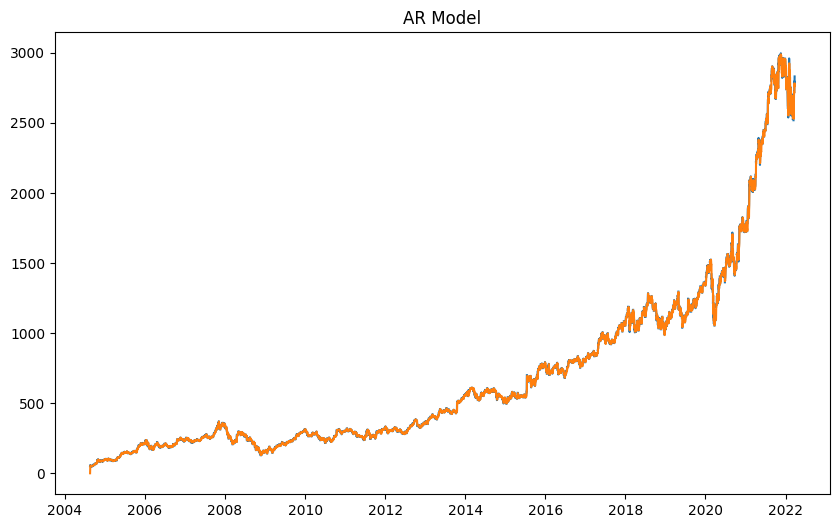

In [23]:
# Visual Representation of AR model
plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.plot(fit_model.fittedvalues)
plt.title('AR Model')

#### Forecasting

In [24]:
forecast = fit_model.get_forecast(steps=150)
forecast

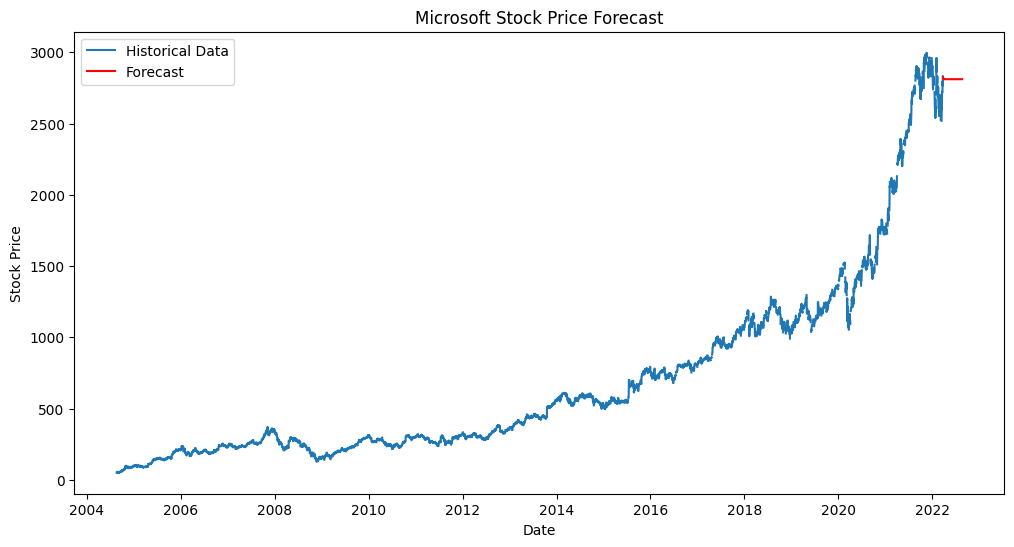

In [25]:
# Visualization and Interpretation
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.title('Microsoft Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
# Reporting
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6427
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -18699.671
Date:                Wed, 24 Jan 2024   AIC                          37421.343
Time:                        10:13:13   BIC                          37495.792
Sample:                    08-19-2004   HQIC                         37447.107
                         - 03-24-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1309      0.513     -0.255      0.799      -1.137       0.875
ar.L2          0.2836      0.271      1.046      0.295      -0.248       0.815
ar.L3          0.3060      0.179      1.713      0.087      -0.044       0.656
ar.L4         -0.0988      0.259     -0.382      0.702      -0.606       0.408
ar.L5          0.0345      0.125      0.277      0.782      -0.210       0.279
ma.L1         -0.0164      0.513     -0.032      0.975      -1.021       0.989
ma.L2         -0.3727      0.210     -1.772      0.076      -0.785       0.039
ma.L3         -0.2287      0.234     -0.977      0.328      -0.687       0.230
ma.L4          0.1688      0.231      0.731      0.465      -0.284       0.622
ma.L5         -0.0904      0.090     -1.003      0.316      -0.267       0.086
sigma2       223.2312      1.404    158.946      0.000     220.479     225.984
===================================================================================
Ljung-Box (L1) (Q):                  16.73   Jarque-Bera (JB):            432416.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              31.17   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""